## 0. 라이브러리 준비

In [3]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Spotify Dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_by_genres_o.csv)

In [2]:
## 데이터 불러오기
## Spotify 
spotify_df = pd.read_csv("./data/tracks.csv")

In [3]:
## Organize dataset : Modify [''] to nan in artists and format of release_date
df = spotify_df.copy()
df.artists = df.artists.replace("['']", np.nan)
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

In [4]:
'''
['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
'id_artists', 'release_date', 'danceability', 'energy', 'key',
'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
'liveness', 'valence', 'tempo', 'time_signature', 'year'],
'''

df_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key',
'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'year']

In [5]:
## Duration average over year
df_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 
              'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

for c in df_columns : #{
    print(c)
    plt.figure(figsize=[9, 6])
    plt.plot(year_df.index, year_df[[c]])
    plt.title(f'{c.capitalize()} History')
    plt.xlabel('Year')
    plt.ylabel(c.capitalize())
#     plt.show()
    plt.savefig(f'./eda_output/line.year_{c}.png')    
#}

In [ ]:
## Compare two features
df_columns = ['duration_ms', 'danceability', 'energy', 'key','loudness', 'speechiness', 'acousticness', 
              'instrumentalness', 'liveness', 'valence', 'tempo', 'year']

for idx, c1 in enumerate(df_columns) : #{
#     if c1 == 'duration_ms' or c1 == 'explicit' : continue
    if idx == 0 : continue
    for c2 in df_columns : #{
        if c1 == c2 : continue
        print(c1, c2)
        plt.title(f'{c1.capitalize()} vs {c2.capitalize()} Scatterplot')
        plt.scatter(df[c1], df[c2], c=df['popularity'], s=1, alpha=.7)
        plt.xlabel(c1.capitalize())
        plt.ylabel(c2.capitalize())
        plt.colorbar()
        
        plt.savefig(f'./eda_output/scatter.{c1}_{c2}.png')
        plt.show()
    #}
#}

danceability duration_ms


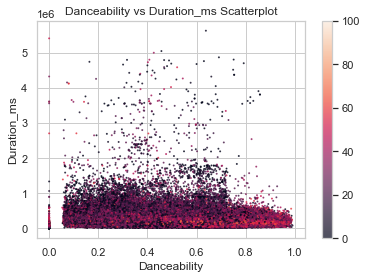

danceability danceability


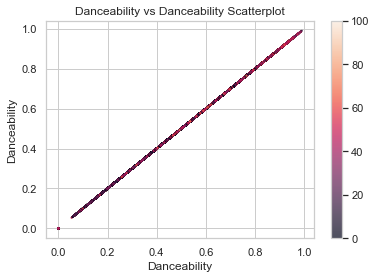

danceability energy


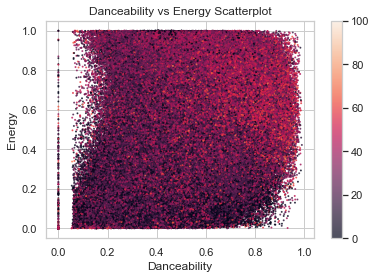

danceability key


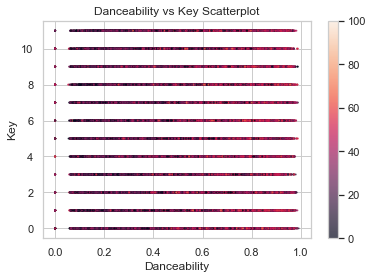

danceability loudness


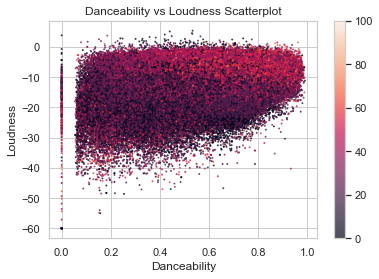

danceability speechiness


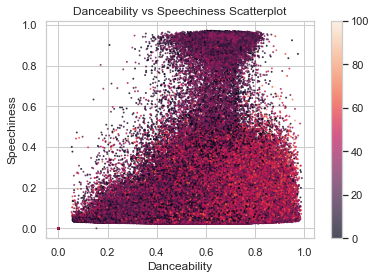

danceability acousticness


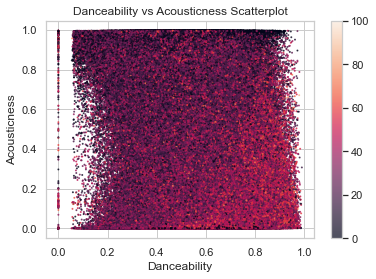

danceability instrumentalness


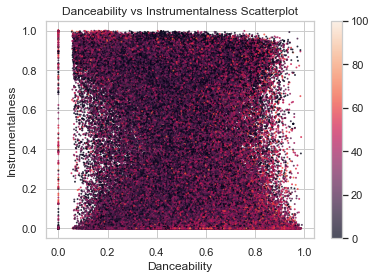

danceability liveness


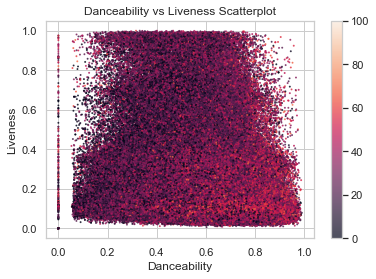

danceability valence


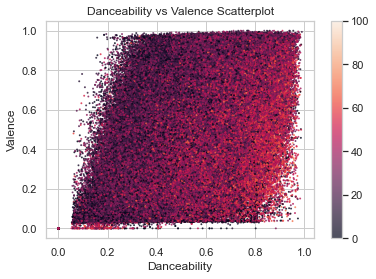

danceability tempo


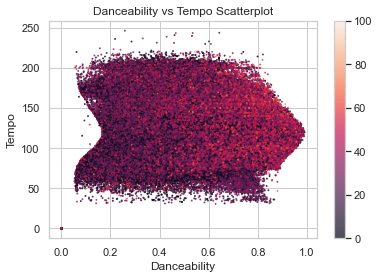

danceability year


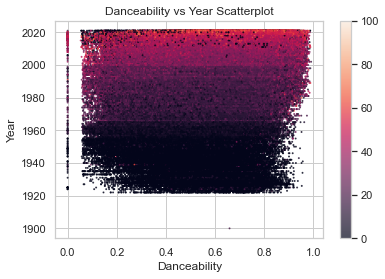

In [16]:
c1 = 'energy'
for c2 in df_columns : #{
    if c1 == c2 : continue
    print(c1, c2)
    plt.title(f'{c1.capitalize()} vs {c2.capitalize()} Scatterplot')
    plt.scatter(df[c1], df[c2], c=df['popularity'], s=1, alpha=.7)
    plt.xlabel(c1.capitalize())
    plt.ylabel(c2.capitalize())
    plt.colorbar()

    plt.savefig(f'./eda_output/scatter.{c1}_{c2}.png')
    plt.show()
#}

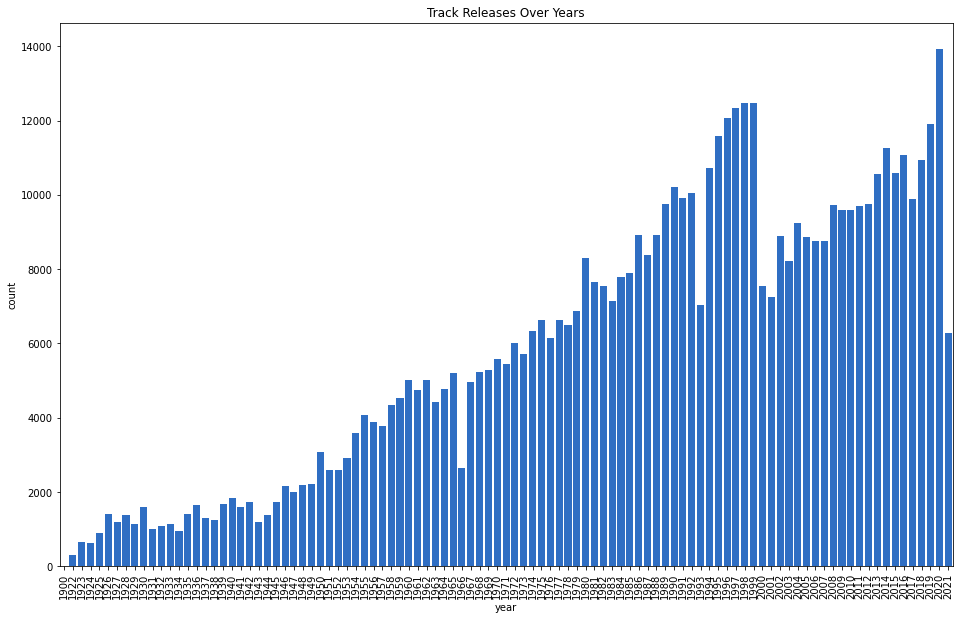

<Figure size 432x288 with 0 Axes>

In [7]:
## realeas amount over year
df['year'] = df['release_date'].dt.year
base_color = sns.color_palette()[0]
plt.figure(figsize = [16, 10])
plt.xticks(rotation=90)
plt.title('Track Releases Over Years')
sns.countplot(data=df, x='year', color='#166ADC')
plt.show()
plt.savefig(f'./eda_output/cnt.year_release.png')

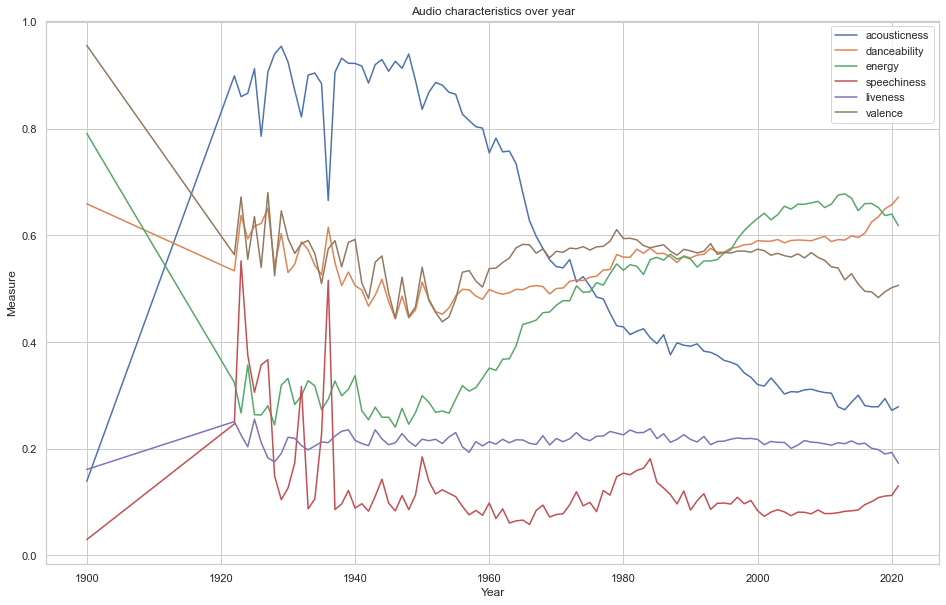

In [8]:
## Audio characteristics over year
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col);
ax.set_title('Audio characteristics over year');
ax.set_ylabel('Measure');
ax.set_xlabel('Year');

plt.savefig(f'./eda_output/line.year_audiofeatures.png')

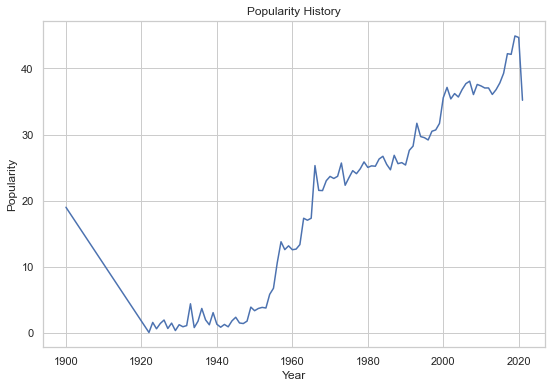

In [9]:
## Popularity average over year
year_df = df.groupby('year').mean()
year_index = list(year_df.index)

plt.figure(figsize=[9, 6])
plt.plot(year_df.index, year_df[['popularity']])
plt.title('Popularity History')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

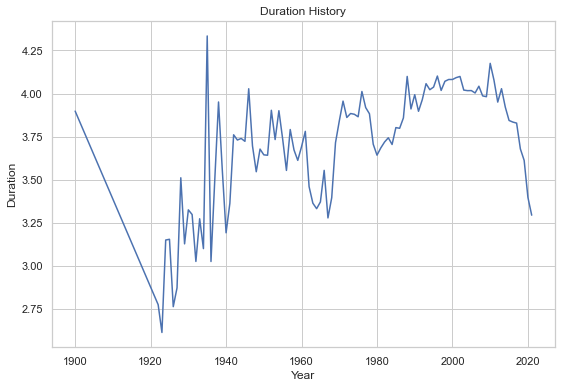

<Figure size 432x288 with 0 Axes>

In [10]:
## Duration average over year
plt.figure(figsize=[9, 6])
plt.plot(year_df.index, year_df[['duration_ms']]/60000)
plt.title('Duration History')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()
plt.savefig(f'./eda_output/line.year_audiofeatures.png')

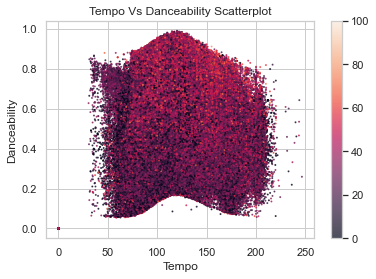

In [11]:
## Compare Two Features
plt.title('Tempo Vs Danceability Scatterplot')
plt.scatter(df['tempo'], df['danceability'], c=df['popularity'], s=1, alpha=.7)
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.colorbar()
plt.show()

In [5]:
artist_df = pd.read_csv("../Web/static/data/data_by_artist_o.csv")

In [8]:
artist_df.genres.unique()

array(["['show tunes']", '[]', "['comedy rock', 'comic', 'parody']", ...,
       "['mainland chinese pop', 'zhongguo feng']",
       "['c-pop', 'classic mandopop', 'mainland chinese pop', 'mandopop']",
       "['chinese indie', 'chinese indie rock']"], dtype=object)